Данный датасет  представляет собой информацию о песнях. Необходимо предсказать прослушивания песен от их популярности.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

data= pd.read_csv('spotify_songs_dataset.csv')
data

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.0,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.0,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,NaN
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.0,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,NaN
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.0,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,NaN


Мы видим, что столбцы (признаки) имеют имена:

*  song_id - уникальный идентификатор песни
*  song_title - название песни
*  artist - артист, исполняющий песню
*  album - альбом, в котором звучит эта песня
*  genre - музыкальный жанр песни
*  release_date - дата выхода песни
*  duration - продолжительность песни (в секундах)
*  popularity - рейтинг популярности песни (1-100)
*  stream - общее количество прослушиваний песни
*  language - язык, на котором написана песня
*  explicit_content - содержит ли песня откровенное содержание (например, ненормативную лексику)
*  label - компания звукозаписи, который опубликовала эту песню
*  composer - композитор этой песни
*  producer - продюсер этой песни
*  collaboration - является ли эта песня результатом совместной работы с другими исполнителями

In [2]:
print(data.dtypes)

song_id              object
song_title           object
artist               object
album                object
genre                object
release_date         object
duration            float64
popularity            int64
stream                int64
language             object
explicit_content     object
label                object
composer             object
producer             object
collaboration        object
dtype: object


Имена столбцов можно получить таким образом:

In [3]:
data.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

Имена строк

In [4]:
data.index

RangeIndex(start=0, stop=50000, step=1)

Столбец "genre" имеет категориальный признак. Пока он имеет тип 'object'. Заменим на специальный, предназначенный для хранения категориальных значений.

In [5]:
data['genre'].dtype

dtype('O')

In [6]:
data['genre'] = data['genre'].astype('category')

In [7]:
data['genre'].dtype

CategoricalDtype(categories=['Classical', 'Country', 'Electronic', 'Folk', 'Hip-Hop',
                  'Jazz', 'Pop', 'R&B', 'Reggae'],
, ordered=False, categories_dtype=object)

In [8]:
data.at[2, 'genre']

'Pop'

In [9]:
data.describe()

,duration,popularity,stream
count,45000.000000,50000.000000,5.000000e+04
mean,239.659178,50.783440,5.019183e+07
std,50.136727,28.948749,2.893624e+07
min,33.000000,1.000000,1.899000e+03
25%,206.000000,26.000000,2.523311e+07
50%,240.000000,51.000000,5.042169e+07
75%,273.000000,76.000000,7.519064e+07
max,433.000000,100.000000,9.999913e+07


Найдем основные характеристики

Среднее

In [10]:
mean_score = data[['duration', 'popularity', 'stream']].mean()
mean_score

,0
duration,2.396592e+02
popularity,5.078344e+01
stream,5.019183e+07


Матрица корреляции

In [11]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,duration,popularity,stream
duration,1.000000,0.000256,0.000947
popularity,0.000256,1.000000,-0.000579
stream,0.000947,-0.000579,1.000000


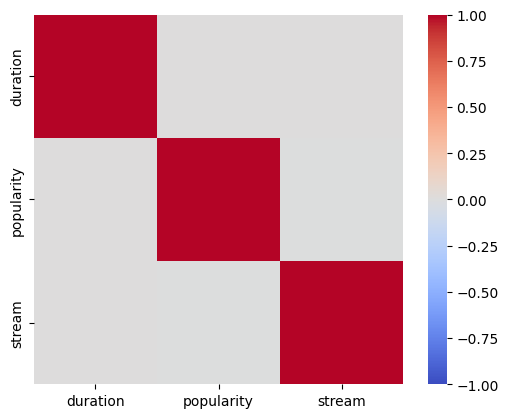

In [12]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных

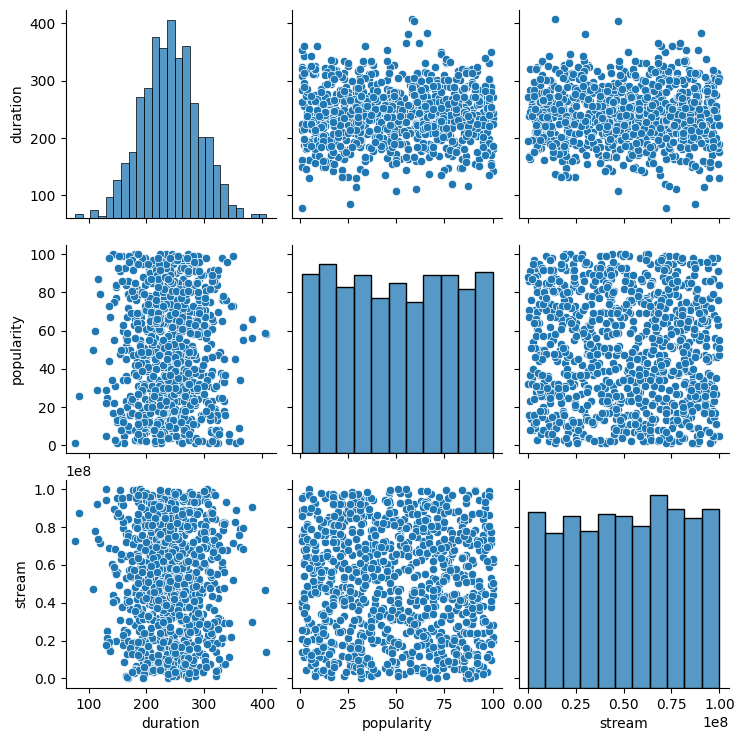

In [13]:
sns.pairplot(data.sample(1000), diag_kind='hist')
pass

In [14]:
data['popularity'].quantile([0.005, .01, .1, .5, .9, .99, .995])

,popularity
0.005,1.0
0.010,1.0
0.100,11.0
0.500,51.0
0.900,91.0
0.990,99.0
0.995,100.0


Обрабатываем выбросы

In [15]:
data['stream'].quantile([0.005, .01, .1, .5, .9, .99, .995])

,stream
0.005,4.951414e+05
0.010,9.837586e+05
0.100,9.947635e+06
0.500,5.042169e+07
0.900,9.020397e+07
0.990,9.896604e+07
0.995,9.946109e+07


In [16]:
rows_to_drop = data[
    (data['popularity'] < data['popularity'].quantile(0.005)) | (data['popularity'] > data['popularity'].quantile(0.995)) |
    (data['stream']  < data['stream'].quantile(0.005)) | (data['stream']  > data['stream'].quantile(0.995))].index
data_raw = data.drop(rows_to_drop)
data_raw.shape

(49500, 15)

Находим пропущенные значения, чтобы в дальнейшем их заполнить

In [17]:
data.isnull().sum()

,0
song_id,0
song_title,0
artist,0
album,0
genre,0
release_date,0
duration,5000
popularity,0
stream,0
language,2500


In [19]:
data['collaboration'].fillna("Unknown", inplace=True)

In [21]:
data['language'].fillna(data_raw['language'].mode().iloc[0], inplace=True)

In [23]:
data['duration'].fillna(data_raw['duration'].median(), inplace=True)

<ipython-input-23-81744aa861a9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(data_raw['duration'].median(), inplace=True)


In [24]:
data.isnull().sum()

,0
song_id,0
song_title,0
artist,0
album,0
genre,0
release_date,0
duration,0
popularity,0
stream,0
language,0


In [25]:
data.describe()

,duration,popularity,stream
count,50000.000000,50000.000000,5.000000e+04
mean,239.693260,50.783440,5.019183e+07
std,47.563933,28.948749,2.893624e+07
min,33.000000,1.000000,1.899000e+03
25%,210.000000,26.000000,2.523311e+07
50%,240.000000,51.000000,5.042169e+07
75%,269.000000,76.000000,7.519064e+07
max,433.000000,100.000000,9.999913e+07


In [26]:
data.describe(include=['category'])

,genre
count,50000
unique,9
top,Electronic
freq,12568


Выполняем бинаризацию для категориального признака

In [52]:
genre_dummies = pd.get_dummies(data['genre']).astype(int)

In [28]:
genre_dummies.columns = ['Classical', 'Country', 'Electronic', 'Folk', 'Hip-Hop',
                  'Jazz', 'Pop', 'R&B', 'Reggae']

In [29]:
genre_dummies.head()

,Classical,Country,Electronic,Folk,Hip-Hop,Jazz,Pop,R&B,Reggae
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0


Добавим эти dummy-столбцы к таблице и удалим столбец "genre"

In [30]:
data = pd.concat((data, genre_dummies), axis=1)

In [31]:
data.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,...,collaboration,Classical,Country,Electronic,Folk,Hip-Hop,Jazz,Pop,R&B,Reggae
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,...,Unknown,0,0,1,0,0,0,0,0,0
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,...,Unknown,0,0,1,0,0,0,0,0,0
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,240.0,10,76669110,English,...,Unknown,0,0,0,0,0,0,1,0,0
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,...,Unknown,0,0,0,0,1,0,0,0,0
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,...,Unknown,0,0,0,0,0,0,1,0,0


Нормализация количественных признаков

In [32]:
numeric_data = data.select_dtypes(include=[np.number])

In [33]:
data_stand = (numeric_data - numeric_data.mean(axis=0)) / numeric_data.std(axis=0)

In [35]:
duplicates = data_stand.columns[data_stand.columns.duplicated()].unique()

In [36]:
data_stand = data_stand.loc[:, ~data_stand.columns.duplicated()]

In [53]:
data_stand.describe()

,duration,popularity,stream,Classical,Country,Electronic,Folk,Hip-Hop,Jazz,Pop,R&B,Reggae
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-1.864464e-16,4.106937e-17,6.821210e-17,-7.219114e-17,-8.441248e-17,1.032774e-16,-8.526513e-19,3.609557e-17,7.815970e-19,-3.097966e-17,-5.783818e-17,1.918465e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.345588e+00,-1.719710e+00,-1.734501e+00,-2.314348e-01,-2.299442e-01,-5.794383e-01,-2.322490e-01,-5.711244e-01,-2.296066e-01,-5.783914e-01,-1.766455e-01,-1.407274e-01
25%,-6.242810e-01,-8.561144e-01,-8.625419e-01,-2.314348e-01,-2.299442e-01,-5.794383e-01,-2.322490e-01,-5.711244e-01,-2.296066e-01,-5.783914e-01,-1.766455e-01,-1.407274e-01
50%,6.449004e-03,7.480807e-03,7.943469e-03,-2.314348e-01,-2.299442e-01,-5.794383e-01,-2.322490e-01,-5.711244e-01,-2.296066e-01,-5.783914e-01,-1.766455e-01,-1.407274e-01
75%,6.161547e-01,8.710760e-01,8.639271e-01,-2.314348e-01,-2.299442e-01,1.725775e+00,-2.322490e-01,-5.711244e-01,-2.296066e-01,1.728898e+00,-1.766455e-01,-1.407274e-01
max,4.064145e+00,1.700127e+00,1.721277e+00,4.320784e+00,4.348794e+00,1.725775e+00,4.305637e+00,1.750897e+00,4.355189e+00,1.728898e+00,5.660944e+00,7.105793e+00


Отбор признаков

In [38]:
data_raw.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

In [71]:
X = data_raw.drop(['song_id', 'song_title', 'release_date', 'duration', 'explicit_content',  'collaboration', 'artist', 'genre', 'album', 'producer', 'composer', 'label', 'language'], axis=1)
y = data_raw['stream']

Разбиваем на обучающую и тестовую выборки

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(37125, 12375)

Линейная регрессия

In [73]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [75]:
lr_model.coef_

array([6.94950013e-14, 1.00000000e+00])

Измеряем метрики качества

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(2.296160712932323e-16, 2.340858692437948e-16, 1.0, 1.0)

In [77]:
lr_model.score(X_train, y_train) # Коэффициент детерминации R^2

1.0

In [78]:
lr_model.score(X_test, y_test)

1.0

In [79]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(2.296160712932323e-16, 2.340858692437948e-16)

In [80]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(1.5153087846813015e-08, 1.5299865007371626e-08)

Как зависят прослушивания от популярности?

In [81]:
lr_model = LinearRegression()
lr_model.fit(X_train[['popularity']], y_train)

y_train_predict = lr_model.predict(X_train[['popularity']])
y_test_predict  = lr_model.predict(X_test[['popularity']])

In [82]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [85]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(28637371.88750718, 28684735.60797422)

Ошибка выросла


**Выводы**

Оценка прослушиваний по популярности с помощью линейной регрессии дает неоднозначеные результаты и требует дальнейшего анализа. Высокая популярность не всегда может гарантировать большое число прослушиваний, на это могут влиять другие признаки. Для более точной оценки прослушиваний можно использовать более сложные методы.